## Map Search

In [2]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()#字符串输入错误会报错

In [3]:
dictionary = {}

In [4]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [5]:
import networkx as nx

In [6]:
%matplotlib inline

In [7]:
g = nx.Graph(connection)

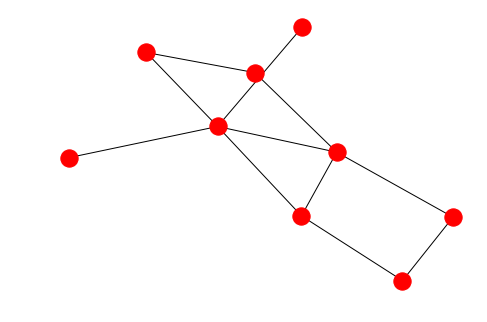

In [8]:
nx.draw(g)

In [9]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

In [10]:
nagivator(BEIJING,BANGKOK,connection)

['BEIJING', 'SHENZHEN', 'BANGKOK']

In [11]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

In [12]:
nagivator_bfs(BEIJING,BANGKOK,connection)

standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on CHANGCHUN Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [13]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

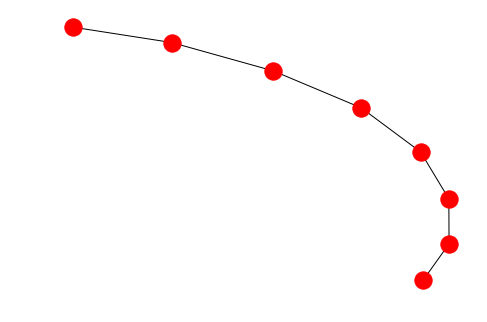

In [14]:
nx.draw(nx.Graph(connection_2))

In [15]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [16]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [17]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [18]:
def draw_route(routes):
    print('🛫->'.join(routes))

In [19]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN🛫->BEIJING🛫->SHENZHEN🛫->BANGKOK


## Sentence Generation

In [20]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [21]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [22]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [23]:
import random

In [25]:
generate("verb_phrase") = generate("verb") + generate("noun_phrase")
generate('noun') = random.choice("女人 |  篮球 | 桌子 | 小猫")

SyntaxError: can't assign to function call (<ipython-input-25-767d77824cd0>, line 1)

In [ ]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [ ]:
g = parse_grammar(grammar)

In [ ]:
g

In [ ]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [ ]:
g['sentence']

In [ ]:
gene(g)

In [ ]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))